In [1]:
import os
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

import time 


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense



In [2]:
train_dir = 'data3a/training'
val_dir = 'data3a/validation'

In [3]:
img_width, img_height = 150, 150

In [4]:
epoch = 50
batch_size=32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
import os

# Step 2: Print current working directory
print("Current Working Directory:", os.getcwd())

# Step 3: Create the directory if it doesn't exist
train_dir = 'data3a/training'
if not os.path.exists(train_dir):
	os.makedirs(train_dir, exist_ok=True)
	print(f"Created directory: {train_dir}")
else:
	print(f"Directory already exists: {train_dir}")

Current Working Directory: C:\Users\sandi\Documents\TA\Dataset and CNN Models Notebooks
Directory already exists: data3a/training


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [8]:

resnet_model = Sequential()
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_width,img_height,3),
    pooling='max',
    classes=3,
    weights='imagenet'
)
for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
# minor moderate and severe (3)
resnet_model.add(Dense(3, activation='softmax'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24113027 (91.98 MB)
Trainable params: 525315 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
#Model compile
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Model Train 
history = resnet_model.fit(train_generator, epochs=epoch, validation_data=val_generator)

start_time = time.time()
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total training time: {elapsed_time:.2f} seconds")

Epoch 1/50
44/44 [==============================] - 50s 1s/step - loss: 1.2927 - accuracy: 0.3753 - val_loss: 1.0177 - val_accuracy: 0.4879
Epoch 2/50
44/44 [==============================] - 42s 963ms/step - loss: 1.1229 - accuracy: 0.4035 - val_loss: 0.9162 - val_accuracy: 0.5605
Epoch 3/50
44/44 [==============================] - 34s 780ms/step - loss: 1.0414 - accuracy: 0.4671 - val_loss: 1.0208 - val_accuracy: 0.5323
Epoch 4/50
44/44 [==============================] - 35s 792ms/step - loss: 1.0820 - accuracy: 0.4447 - val_loss: 0.9040 - val_accuracy: 0.5565
Epoch 5/50
44/44 [==============================] - 36s 822ms/step - loss: 1.0518 - accuracy: 0.4620 - val_loss: 0.8965 - val_accuracy: 0.5766
Epoch 6/50
44/44 [==============================] - 35s 788ms/step - loss: 0.9994 - accuracy: 0.4931 - val_loss: 0.9712 - val_accuracy: 0.4919
Epoch 7/50
44/44 [==============================] - 36s 825ms/step - loss: 1.0262 - accuracy: 0.4801 - val_loss: 0.9221 - val_accuracy: 0.5565
Ep

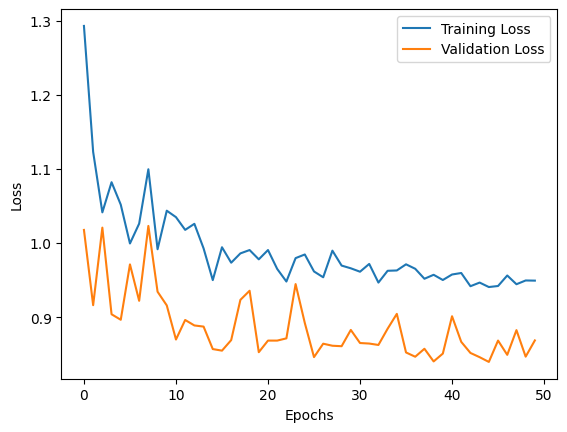

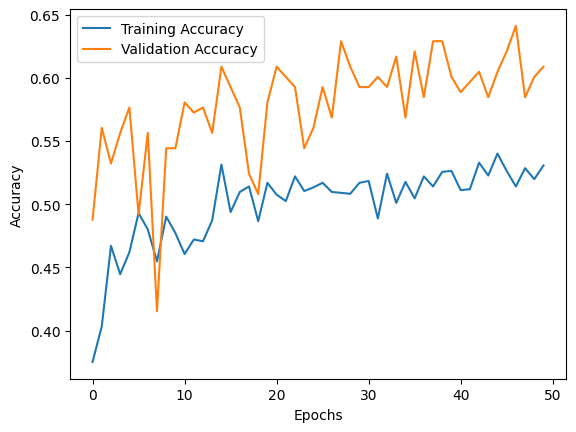

In [12]:
import matplotlib.pyplot as plt
# loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
from sklearn.metrics import f1_score
# # f1 score
# plt.plot(history.history['f1_score'], label='Training F1 Score')
# plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.legend()
# plt.show()

8/8 [==============================] - 8s 911ms/step
Confusion Matrix:


C:\Users\sandi\AppData\Local\Temp\ipykernel_9316\1369690478.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
C:\Users\sandi\AppData\Local\Temp\ipykernel_9316\1369690478.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])


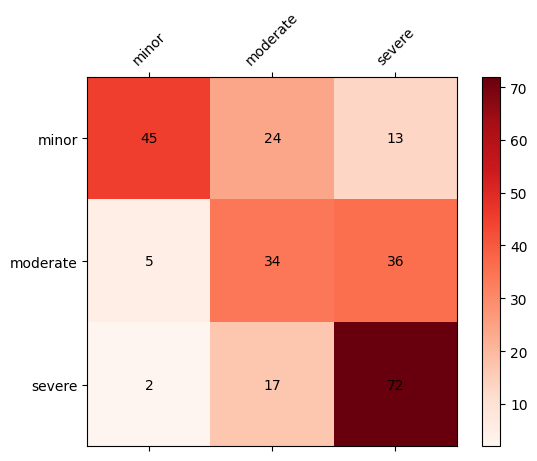

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.87      0.55      0.67        82
 02-moderate       0.45      0.45      0.45        75
   03-severe       0.60      0.79      0.68        91

    accuracy                           0.61       248
   macro avg       0.64      0.60      0.60       248
weighted avg       0.64      0.61      0.61       248



In [13]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = resnet_model.predict(val_images)



from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)

In [14]:
resnet_model.save('resnet50-model.keras')
print('model saved')

model saved


1/1 [==============================] - 0s 111ms/step


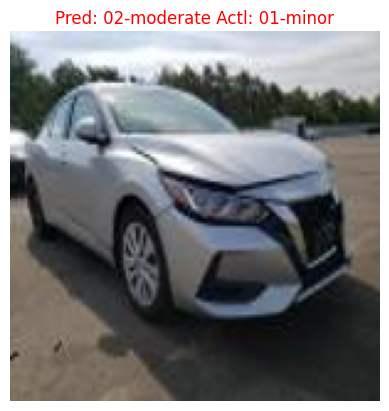

1/1 [==============================] - 0s 93ms/step


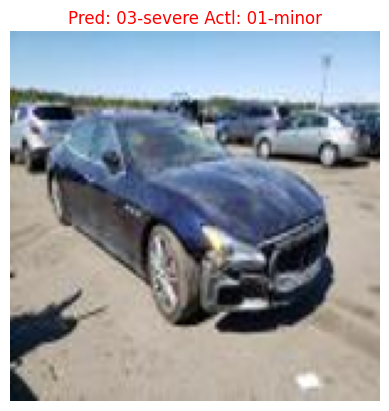

1/1 [==============================] - 0s 126ms/step


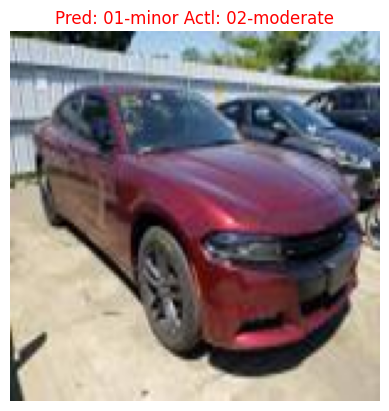

1/1 [==============================] - 0s 102ms/step


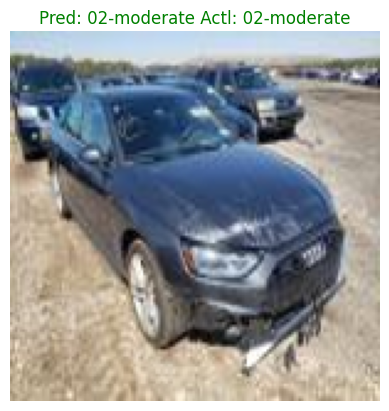

1/1 [==============================] - 0s 121ms/step


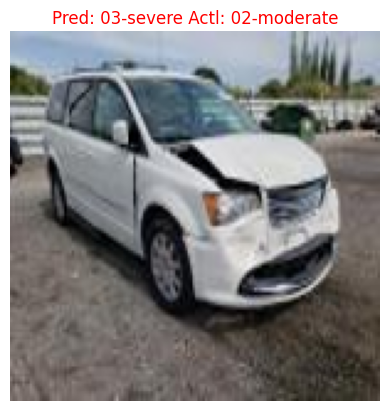

1/1 [==============================] - 0s 110ms/step


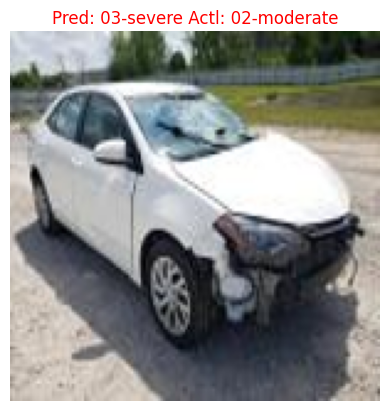

1/1 [==============================] - 0s 93ms/step


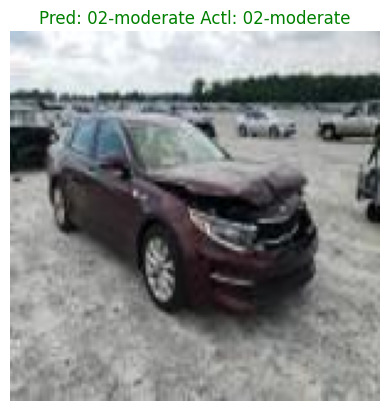

1/1 [==============================] - 0s 83ms/step


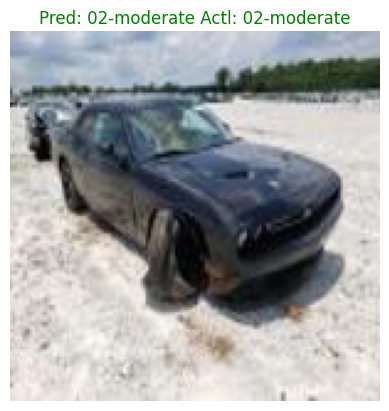

1/1 [==============================] - 0s 103ms/step


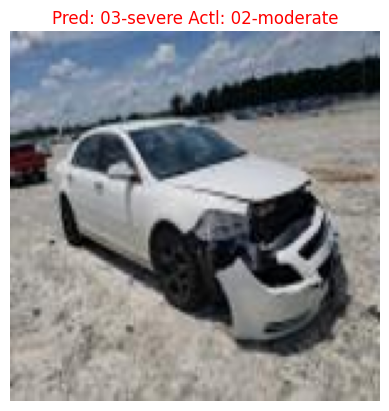

1/1 [==============================] - 0s 101ms/step


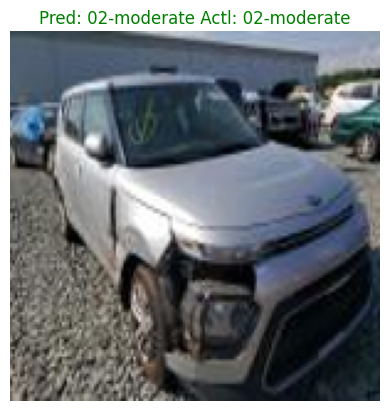

1/1 [==============================] - 0s 85ms/step


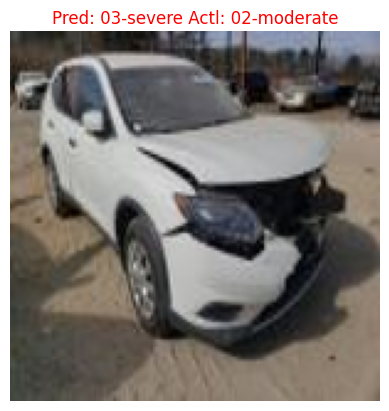

1/1 [==============================] - 0s 115ms/step


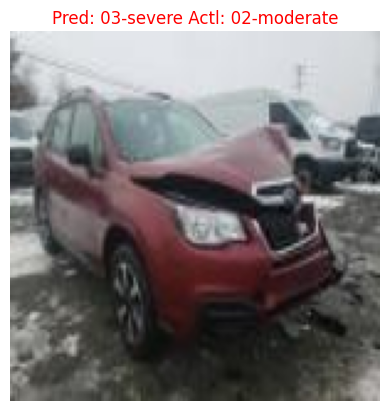

1/1 [==============================] - 0s 102ms/step


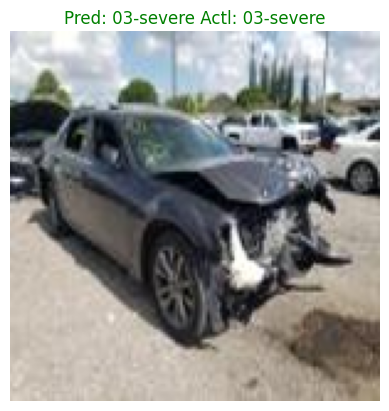

1/1 [==============================] - 0s 109ms/step


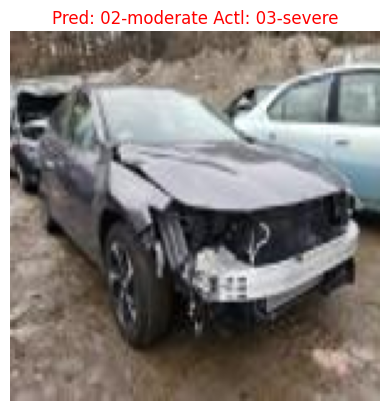

1/1 [==============================] - 0s 109ms/step


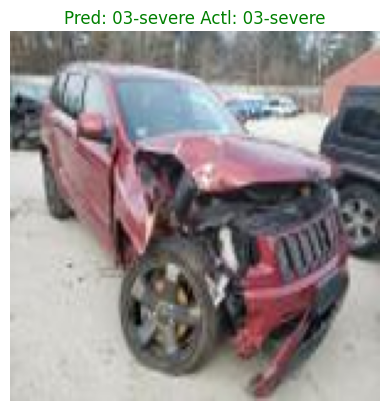

1/1 [==============================] - 0s 94ms/step


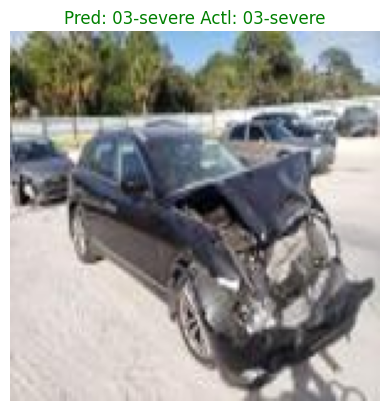

1/1 [==============================] - 0s 78ms/step


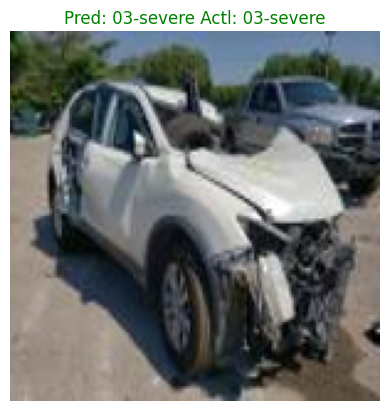

1/1 [==============================] - 0s 125ms/step


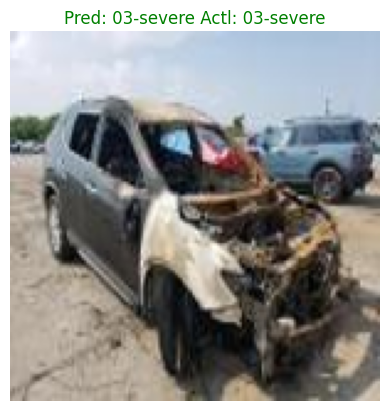

1/1 [==============================] - 0s 109ms/step


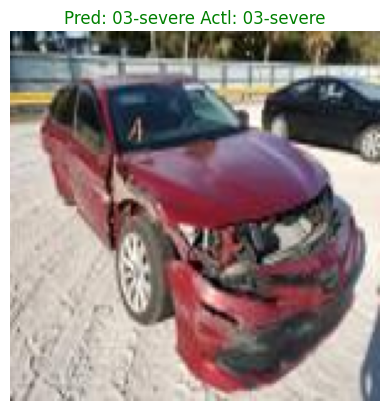

1/1 [==============================] - 0s 125ms/step


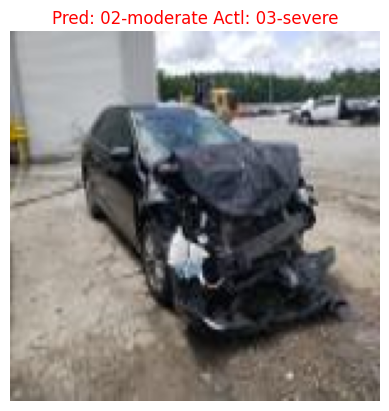

1/1 [==============================] - 0s 109ms/step


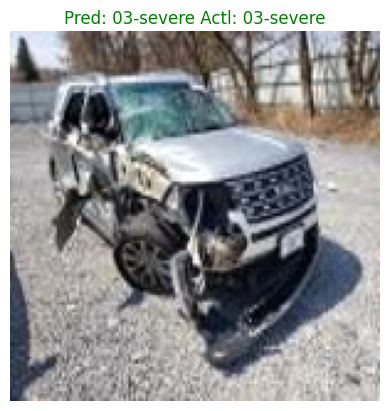

1/1 [==============================] - 0s 110ms/step


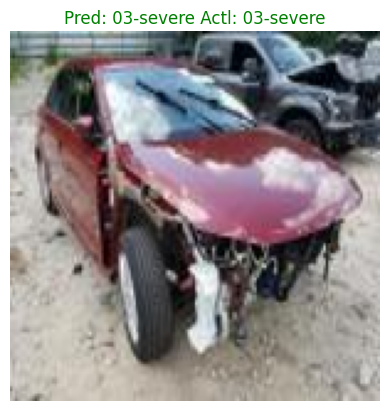

False: 10
True: 12


In [16]:
val_dir = 'data3a/validation'
class_names = ["01-minor", "02-moderate", "03-severe"]

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = resnet_model.predict(img)
    pred_label = class_names[np.argmax(pred)]
    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1
   
    plt.axis('off')
    plt.show() 
print('False: '+ str(negative) + '\nTrue: ' + str(positive))